# 2. Arrests

## Code to Find Arrest Rates in Each Neighborhood

My approach for all 5 of the neighborhoods was essentially the same, except for replacing some ZIP codes/populations that corresponded to each neighborhood. I first trimmed the massive dataframe to only include information I cared about (mainly arrest location and the offense(s)). After that, I trimmed the dataframe to only include the ZIP code I was searching for information on. After having a dataframe with information limited to the appropriate ZIP, I began to look for more specific information.

To find the general arrest rate, I simply found the number of rows in the dataframe trimmed to the ZIP code, since each row represented an individual arrest. After finding this number, I divided it by the ZIP's population multiplied by the number of years the dataframe went back (in this case, 5.25). This left me with the neighborhood's yearly arrest rate, per citizen.

Next was to search for the rates of more serious offenses, such as assault, robbery, and firearm posession. The approach was essentially identical for all 3. To get these, I took the ZIP-trimmed dataframe and filtered out the appropriate keywords (eg. 'assault'). The number of rows of this new dataframe gave me the number of individual arrests for the appropriate offense. To get the rate, just like described above, I took the number of rows and divided it by the population multiplied by the number of years the dataframe went back. This gave me the neighborhood's yearly arrest rate for the given charge, per citizen. 

I multiplied all rates by 1000, to make them represent the number of arrests per 1000 people instead of the number of arrests per 1 person. In this case, a rate out of 1000 is far easier to decipher and put into perspective than the alternative.

### 1) Oakland

In [2]:
import pandas as pd

crime = pd.read_csv("CrimeRate.csv")
trimCrime = crime[['ARRESTLOCATION', 'X', 'Y', 'OFFENSES']]

oaklandTrim = trimCrime[trimCrime['ARRESTLOCATION'].str.contains("15213")]
oaklandArrest = ((oaklandTrim.shape[0]/30844)/5.25)*1000
print("Oakland arrest rate: " + str((oaklandTrim.shape[0]/30844)/5.25) + " - for every 1000 residents, ~" + 
      str(round(oaklandArrest, 3)) + " people are arrested.")

oaklandAssault = oaklandTrim[oaklandTrim['OFFENSES'].str.contains("Assault")]
oaklandAssaultRate = (oaklandAssault.shape[0]/(30844*5.25))*1000
print("Oakland assault arrest rate: " + str((oaklandAssault.shape[0]/(30844*5.25))) + " - for every 1000 residents, ~" 
      + str(round(oaklandAssaultRate, 3)) + " people are arrested for assault.")

oaklandRobbery = oaklandTrim[oaklandTrim['OFFENSES'].str.contains("Robbery")]
oaklandRobberyRate = (oaklandRobbery.shape[0]/(30844*5.25))*1000
print("Oakland robbery arrest rate: " + str((oaklandRobbery.shape[0]/(30844*5.25))) + " - for every 1000 residents, ~" 
      + str(round(oaklandRobberyRate, 3)) + "  people are arrested for assault.")

oaklandFirearms = oaklandTrim[oaklandTrim['OFFENSES'].str.contains("Firearm")]
oaklandFirearmRate = oaklandFirearms.shape[0]/(30844*5.25)*1000
(print("Oakland firearm arrest rate: " + str((oaklandFirearms.shape[0]/(30844*5.25))) + " - for every 1000 residents, ~" 
       + str(round(oaklandFirearmRate, 3)) + " people are arrested for firearm posession."))

Oakland arrest rate: 0.006175469798864948 - for every 1000 residents, ~6.175 people are arrested.
Oakland assault arrest rate: 0.001568569328911697 - for every 1000 residents, ~1.569 people are arrested for assault.
Oakland robbery arrest rate: 0.00020996597316140826 - for every 1000 residents, ~0.21  people are arrested for assault.
Oakland firearm arrest rate: 0.00019761503356367836 - for every 1000 residents, ~0.198 people are arrested for firearm posession.


### 2) Shadyside

In [29]:
import pandas as pd

crime = pd.read_csv("CrimeRate.csv")
trimCrime = crime[['ARRESTLOCATION', 'X', 'Y', 'OFFENSES']]

shadyside = ['15232', '15206']
shadyTrim = trimCrime[trimCrime['ARRESTLOCATION'].str.contains('|'.join(shadyside))]
shadyArrest = ((shadyTrim.shape[0]/(11374+28615))/5.25)*1000
print("Shadyside arrest rate: " + str(shadyArrest/1000) + " - for every 1000 residents, ~" 
      + str(round(shadyArrest, 3)) + " people are arrested.")

shadyAssault = shadyTrim[shadyTrim['OFFENSES'].str.contains("Assault")]
shadyAssaultRate = ((shadyAssault.shape[0]/(11374+28615))/5.25)*1000
print("Shadyside assault arrest rate: " + str(shadyAssaultRate/1000) + " - for every 1000 residents, ~" 
      + str(round(shadyAssaultRate, 3)) + " people are arrested for assault.")

shadyRobbery = shadyTrim[shadyTrim['OFFENSES'].str.contains("Robbery")]
shadyRobberyRate = (shadyRobbery.shape[0]/((11374+28615)*5.25)*1000)
print("Shadyside robbery arrest rate: " + str(shadyRobberyRate/1000) + " - for every 1000 residents, ~" 
      + str(round(shadyRobberyRate, 3)) + " people are arrested for robbery.")

shadyFirearms = shadyTrim[shadyTrim['OFFENSES'].str.contains("Firearm")]
shadyFirearmRate = ((shadyFirearms.shape[0]/(11374+28615))/5.25)*1000
print("Shadyside firearm arrest rate: " + str(shadyFirearmRate/1000) + " - for every 1000 residents, ~" 
      + str(round(shadyFirearmRate, 3)) + " people are arrested for illegal firearm posession.")

Shadyside arrest rate: 0.016175876937586407 - for every 1000 residents, ~16.176 people are arrested.
Shadyside assault arrest rate: 0.003515252408698106 - for every 1000 residents, ~3.515 people are arrested for assault.
Shadyside robbery arrest rate: 0.0006811396943683322 - for every 1000 residents, ~0.681 people are arrested for robbery.
Shadyside firearm arrest rate: 0.0008811947094974928 - for every 1000 residents, ~0.881 people are arrested for illegal firearm posession.


### 3) Homewood

In [36]:
import pandas as pd

crime = pd.read_csv("CrimeRate.csv")
trimCrime = crime[['ARRESTLOCATION', 'X', 'Y', 'OFFENSES']]

homewoodTrim = trimCrime[trimCrime['ARRESTLOCATION'].str.contains("15208")]
homewoodArrest = (((homewoodTrim.shape[0]/10406))/5.25)*1000
print("Homewood arrest rate: " + str(homewoodArrest/1000) + " - for every 1000 residents, ~" 
      + str(round(homewoodArrest, 3)) + " people are arrested.")

homewoodAssault = homewoodTrim[homewoodTrim['OFFENSES'].str.contains("Assault")]
hwAssaultRate = (homewoodAssault.shape[0]/(10406*5.25)*1000)
print("Homewood assault arrest rate: " + str(hwAssaultRate/1000) + " - for every 1000 residents, ~" 
      + str(round(hwAssaultRate, 3)) + " people are arrested for assault.")

homewoodRobbery = homewoodTrim[homewoodTrim['OFFENSES'].str.contains("Robbery")]
hwRobberyRate = (homewoodRobbery.shape[0]/(10406*5.25)*1000)
print("Homewood robbery arrest rate: " + str(hwRobberyRate/1000) + " - for every 1000 residents, ~" 
      + str(round(hwRobberyRate, 3)) + " people are arrested for robbery.")

homewoodFirearms = homewoodTrim[homewoodTrim['OFFENSES'].str.contains("Firearm")]
homewoodFirearmRate = (homewoodFirearms.shape[0]/(10406*5.25)*1000)
print("Homewood firearm arrest rate: " + str(homewoodFirearmRate/1000) + " - for every 1000 residents, ~" 
      + str(round(homewoodFirearmRate, 3)) + " people are arrested for firearm posession.")

Homewood arrest rate: 0.039025104564216616 - for every 1000 residents, ~39.025 people are arrested.
Homewood assault arrest rate: 0.007230260930049514 - for every 1000 residents, ~7.23 people are arrested for assault.
Homewood robbery arrest rate: 0.0010067451927917043 - for every 1000 residents, ~1.007 people are arrested for robbery.
Homewood firearm arrest rate: 0.0026175375012584315 - for every 1000 residents, ~2.618 people are arrested for firearm posession.


### 4) Downtown

In [7]:
import pandas as pd

crime = pd.read_csv("CrimeRate.csv")
trimCrime = crime[['ARRESTLOCATION', 'X', 'Y', 'OFFENSES']]

downtownTrim = trimCrime[trimCrime['ARRESTLOCATION'].str.contains("15222")]
downtownArrest = (((downtownTrim.shape[0]/4623))/5.25)*1000
print("Downtown arrest rate: " + str(downtownArrest/1000) + " - for every 1000 residents, ~" 
      + str(round(downtownArrest, 3)) + " people are arrested.")

dtAssault = downtownTrim[downtownTrim['OFFENSES'].str.contains("Assault")]
dtAssaultRate = (dtAssault.shape[0]/(4623*5.25))*1000
print("Downtown assault arrest rate: " + str(dtAssaultRate/1000) + " - for every 1000 residents, ~" 
      + str(round(dtAssaultRate, 3)) + " people are arrested for assault.")

dtRobbery = downtownTrim[downtownTrim['OFFENSES'].str.contains("Robbery")]
dtRobberyRate = (dtRobbery.shape[0]/(4623*5.25))*1000
print("Downtown robbery arrest rate: " + str(dtRobberyRate/1000) + " - for every 1000 residents, ~" 
      + str(round(dtRobberyRate, 3)) + " people are arrested for robbery.")

dtFirearms = downtownTrim[downtownTrim['OFFENSES'].str.contains("Firearm")]
dtFirearmRate = (dtFirearms.shape[0]/(4623*5.25))*1000
print("Downtown firearm arrest rate: " + str(dtFirearmRate/1000) + " - for every 1000 residents, ~" 
      + str(round(dtFirearmRate, 3)) + " people are arrested for illegal firearm posession.")

Downtown arrest rate: 0.08120886251969964 - for every 1000 residents, ~81.209 people are arrested.
Downtown assault arrest rate: 0.014626659662350772 - for every 1000 residents, ~14.627 people are arrested for assault.
Downtown robbery arrest rate: 0.0023897077758206894 - for every 1000 residents, ~2.39 people are arrested for robbery.
Downtown firearm arrest rate: 0.0019364873355788347 - for every 1000 residents, ~1.936 people are arrested for illegal firearm posession.


### 5) Southside

In [3]:
import pandas as pd

crime = pd.read_csv("CrimeRate.csv")
trimCrime = crime[['ARRESTLOCATION', 'X', 'Y', 'OFFENSES']]

southsideTrim = trimCrime[trimCrime['ARRESTLOCATION'].str.contains("15203")]
southsideArrest = (((southsideTrim.shape[0]/9949))/5.25)*1000
print("Southside arrest rate: " + str(southsideArrest/1000) + " - for every 1000 residents, ~" 
      + str(round(southsideArrest, 3)) + " people are arrested.")

ssAssault = southsideTrim[southsideTrim['OFFENSES'].str.contains("Assault")]
ssAssaultRate = (ssAssault.shape[0]/(9949*5.25))*1000
print("Southside assault arrest rate: " + str(ssAssaultRate/1000) + " - for every 1000 residents, ~" 
      + str(round(ssAssaultRate, 3)) + " people are arrested for assault.")

ssRobbery = southsideTrim[southsideTrim['OFFENSES'].str.contains("Robbery")]
ssRobberyRate = (ssRobbery.shape[0]/(9949*5.25))*1000
print("Southside robbery arrest rate: " + str(ssRobberyRate/1000) + " - for every 1000 residents, ~" 
      + str(round(ssRobberyRate, 3)) + " people are arrested for robbery.")

ssFirearms = southsideTrim[southsideTrim['OFFENSES'].str.contains("Firearm")]
ssFirearmRate = (ssFirearms.shape[0]/(9949*5.25))*1000
print("Southside firearms arrest rate: " + str(ssFirearmRate/1000) + " - for every 1000 residents, ~" 
      + str(round(ssFirearmRate, 3)) + " people are arrested for illegal firearm posession.")

Southside arrest rate: 0.04466589128364181 - for every 1000 residents, ~44.666 people are arrested.
Southside assault arrest rate: 0.009476903637120745 - for every 1000 residents, ~9.477 people are arrested for assault.
Southside robbery arrest rate: 0.001033844033140445 - for every 1000 residents, ~1.034 people are arrested for robbery.
Southside firearms arrest rate: 0.0021251238458998034 - for every 1000 residents, ~2.125 people are arrested for illegal firearm posession.


## Graph Representations of Arrest Rates

My approach to the code here was fairly straightforward. Just building arrays for the neighborhoods and their respective values, and plugging them into plotting functions.

### General Arrest Rates Chart, by Neighborhood (per 1000)

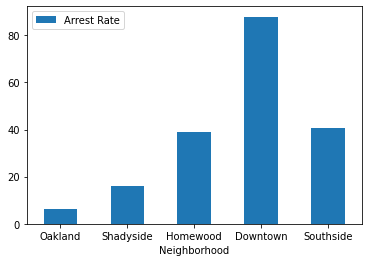

In [2]:
import pandas as pd

df = pd.DataFrame({'Neighborhood':['Oakland', 'Shadyside', 'Homewood', 'Downtown', 'Southside'], 'Arrest Rate':
                   [006.175469798864948, 0016.175876937586407, 0039.025104564216616, 
                    0087.84236169051225, 0040.817694049174603]})
ax = df.plot.bar(x='Neighborhood', y='Arrest Rate', rot=0)

### Assault, Robbery, and Firearm Posession Arrest Rates (Unstacked/Stacked, per 1000)

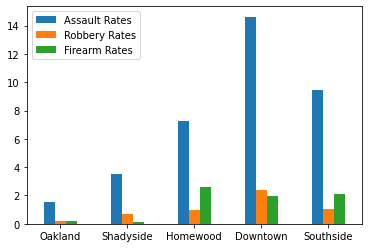

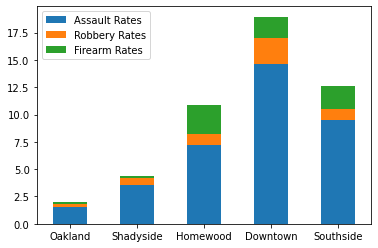

In [3]:
import pandas as pd

assaultRates = [0001.568569328911697, 0003.515252408698106, 0007.230260930049514, 
                0014.626659662350772,0009.476903637120745] 
robberyRates = [0000.20996597316140826, 0000.6811396943683322, 0001.0067451927917043, 
                0002.3897077758206894, 0001.033844033140445]
firearmRates = [0000.19761503356367836, 0000.1524228686698366, 0002.6175375012584315,
                0001.9364873355788347, 0002.1251238458998034]
index = ['Oakland', 'Shadyside', 'Homewood', 'Downtown', 'Southside']
df2 = pd.DataFrame({'Assault Rates': assaultRates, 'Robbery Rates': robberyRates, 
                    'Firearm Rates':  firearmRates}, index=index)
ax2 = df2.plot.bar(rot=0)
ax3 = df2.plot.bar(rot=0, stacked=True)

### General Arrest Rates Combined w/ Assault, Robbery, Firearm Arrest Rates (Stacked/Unstacked, per 1000)

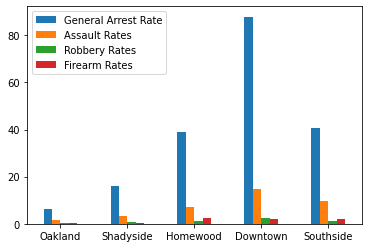

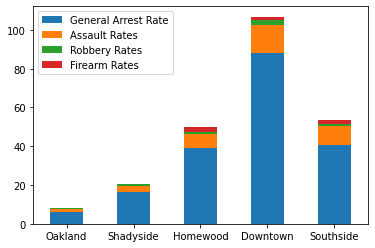

In [4]:
import pandas as pd

arrestRates = [006.175469798864948, 0016.175876937586407, 0039.025104564216616, 
                    0087.84236169051225, 0040.817694049174603]
assaultRates = [0001.568569328911697, 0003.515252408698106, 0007.230260930049514, 
                0014.626659662350772,0009.476903637120745] 
robberyRates = [0000.20996597316140826, 0000.6811396943683322, 0001.0067451927917043, 
                0002.3897077758206894, 0001.033844033140445]
firearmRates = [0000.19761503356367836, 0000.1524228686698366, 0002.6175375012584315,
                0001.9364873355788347, 0002.1251238458998034]
index = ['Oakland', 'Shadyside', 'Homewood', 'Downtown', 'Southside']
df2 = pd.DataFrame({'General Arrest Rate': arrestRates, 'Assault Rates': assaultRates, 'Robbery Rates': robberyRates, 
                    'Firearm Rates':  firearmRates}, index=index)
ax2 = df2.plot.bar(rot=0)
ax3 = df2.plot.bar(rot=0, stacked=True)

## Code to Find the Most Common Arrest Offenses in Each Neighborhood

My goal in this section of the code was to find the most common arrest offenses in each neighborhood in order to achieve more insight into what kinds of crimes are being committed in each neighborhood. My approach to finding this information for all 5 neighborhoods was very similar. Similar to the code blocks above (to find arrest rates), my first step was to trim the dataframe to the aspects I cared about, and subsequently filter out irrelevant ZIP codes. From there, I had a dataframe with only relevant data in appropriate areas. 

Next, I created a list of arrest offenses that were either irrelevant/too vague to be placed in the list. For example, 'Bench Warrant' was the most common offense in each neighborhood, but a Bench Warrant simply describes a situation where a judge issues an arrest warrant. Since the reason for the warrant is not included, we do not gain much information from this offense, so I removed them from the dataframe. After that, I simply used the idxmax() function to identify the most commonly occuring string in the 'OFFENSES' column. This returned the most common offense for the given ZIP code. After that, I removed that string from the dataframe, to prepare to find the *next* most common offense. I repeated this 5 times in order to find the 5 most common offenses in each neighborhood.

### Oakland

In [34]:
import pandas as pd

crime = pd.read_csv("CrimeRate.csv")
trimCrime = crime[['ARRESTLOCATION', 'X', 'Y', 'OFFENSES']]
ignoreCrimes = ['Bench Warrant', '9015', '9093 Indirect Criminal Contempt']

oaklandTrim = trimCrime[trimCrime['ARRESTLOCATION'].str.contains("15213")]

print("The 5 most common arrest charges in Oakland are (from most to least common):")

noBenchOakland = oaklandTrim[~oaklandTrim["OFFENSES"].str.contains('|'.join(ignoreCrimes))]
oaklandCommon = noBenchOakland['OFFENSES'].value_counts().idxmax()
print(oaklandCommon)

noAssaultOakland = noBenchOakland[~noBenchOakland["OFFENSES"].str.contains("Simple Assault")]
oaklandCommon2 = noAssaultOakland['OFFENSES'].value_counts().idxmax()
print(oaklandCommon2)

noFailureOakland = noAssaultOakland[~noAssaultOakland["OFFENSES"].str.contains("3929")]
oaklandCommon3 = noFailureOakland['OFFENSES'].value_counts().idxmax()
print(oaklandCommon3)

noWeedOakland = noFailureOakland[~noFailureOakland["OFFENSES"].str.contains("Marijuana: Possession Small Amount")]
oaklandCommon4 = noWeedOakland['OFFENSES'].value_counts().idxmax()
print(oaklandCommon4)

noParaOakland = noWeedOakland[~noWeedOakland["OFFENSES"].str.contains("Paraphernalia - Use or Possession")]
oaklandCommon5 = noParaOakland['OFFENSES'].value_counts().idxmax()
print(oaklandCommon5)

The 5 most common arrest charges in Oakland are (from most to least common):
2701 Simple Assault.
3929 Retail Theft.
13(a)(31) Marijuana: Possession Small Amount
13(a)(32) Paraphernalia - Use or Possession
2702 Aggravated Assault.


### Shadyside

In [35]:
import pandas as pd

crime = pd.read_csv("CrimeRate.csv")
trimCrime = crime[['ARRESTLOCATION', 'X', 'Y', 'OFFENSES']]
ignoreCrimes = ['Bench Warrant', '9015', '9093 Indirect Criminal Contempt', 'Failure To Appear/Arrest on Attachment Order']

shadyside = ['15232', '15206']
shadyTrim = trimCrime[trimCrime['ARRESTLOCATION'].str.contains('|'.join(shadyside))]

print("The 5 most common arrest charges in Shadyside are (from most to least common):")

noBsShady = shadyTrim[~shadyTrim["OFFENSES"].str.contains('|'.join(ignoreCrimes))]
shadyCommon = noBsShady['OFFENSES'].value_counts().idxmax()
print(shadyCommon)

noAssaultShady = noBsShady[~noBsShady["OFFENSES"].str.contains("Simple Assault")]
shadyCommon2 = noAssaultShady['OFFENSES'].value_counts().idxmax()
print(shadyCommon2)

noRetailShady = noAssaultShady[~noAssaultShady["OFFENSES"].str.contains("3929")]
shadyCommon3 = noRetailShady['OFFENSES'].value_counts().idxmax()
print(shadyCommon3)

noWeedShady = noRetailShady[~noRetailShady["OFFENSES"].str.contains("Marijuana: Possession Small Amount")]
shadyCommon4 = noWeedShady['OFFENSES'].value_counts().idxmax()
print(shadyCommon4)

noParaShady = noWeedShady[~noWeedShady["OFFENSES"].str.contains
                          ("Possession of Controlled Substance")]
shadyCommon5 = noParaShady['OFFENSES'].value_counts().idxmax()
print(shadyCommon5)

The 5 most common arrest charges in Shadyside are (from most to least common):
2701 Simple Assault.
3929 Retail Theft.
13(a)(31) Marijuana: Possession Small Amount
13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession
13(a)(32) Paraphernalia - Use or Possession


### Homewood

In [36]:
import pandas as pd

crime = pd.read_csv("CrimeRate.csv")
trimCrime = crime[['ARRESTLOCATION', 'X', 'Y', 'OFFENSES']]
ignoreCrimes = ['Bench Warrant', '9015', '9093 Indirect Criminal Contempt', 'Failure To Appear/Arrest on Attachment Order']

homewoodTrim = trimCrime[trimCrime['ARRESTLOCATION'].str.contains("15208")]

print("The 5 most common arrest charges in Homewood are (from most to least common):")

noBsHW = homewoodTrim[~homewoodTrim["OFFENSES"].str.contains('|'.join(ignoreCrimes))]
hwCommon = noBsHW['OFFENSES'].value_counts().idxmax()
print(hwCommon)

noAssaultHW = noBsHW[~noBsHW["OFFENSES"].str.contains("Simple Assault")]
hwCommon2 = noAssaultHW['OFFENSES'].value_counts().idxmax()
print(hwCommon2)

noParaHW = noAssaultHW[~noAssaultHW["OFFENSES"].str.contains("Paraphernalia - Use or Possession")]
hwCommon3 = noParaHW['OFFENSES'].value_counts().idxmax()
print(hwCommon3)

noWeedHW = noParaHW[~noParaHW["OFFENSES"].str.contains("Marijuana: Possession Small Amount")]
hwCommon4 = noWeedHW['OFFENSES'].value_counts().idxmax()
print(hwCommon4)

noPossHW = noWeedHW[~noWeedHW["OFFENSES"].str.contains("Possession of Controlled Substance")]
hwCommon5 = noPossHW['OFFENSES'].value_counts().idxmax()
print(hwCommon5)

The 5 most common arrest charges in Homewood are (from most to least common):
2701 Simple Assault.
13(a)(32) Paraphernalia - Use or Possession
13(a)(31) Marijuana: Possession Small Amount
13(a)(16) Possession of Controlled Substance
2702 Aggravated Assault.


### Downtown

In [41]:
import pandas as pd

crime = pd.read_csv("CrimeRate.csv")
trimCrime = crime[['ARRESTLOCATION', 'X', 'Y', 'OFFENSES']]
ignoreCrimes = ['Bench Warrant', '9015', '9093 Indirect Criminal Contempt', 'Failure To Appear/Arrest on Attachment Order']

downtownTrim = trimCrime[trimCrime['ARRESTLOCATION'].str.contains("15222")]

print("The 5 most common arrest charges in Downtown are (from most to least common):")

noBsDT = downtownTrim[~downtownTrim["OFFENSES"].str.contains('|'.join(ignoreCrimes))]
dtCommon = noBsDT['OFFENSES'].value_counts().idxmax()
print(dtCommon)

noAssaultDT = noBsDT[~noBsDT["OFFENSES"].str.contains("Simple Assault")]
dtCommon2 = noAssaultDT['OFFENSES'].value_counts().idxmax()
print(dtCommon2)

noRetailDT = noAssaultDT[~noAssaultDT["OFFENSES"].str.contains("Retail Theft")]
dtCommon3 = noRetailDT['OFFENSES'].value_counts().idxmax()
print(dtCommon3)

noSolDT = noRetailDT[~noRetailDT["OFFENSES"].str.contains
                     ("902 Criminal Solicitation. / 907 Possessing Instruments of Crime")]
dtCommon4 = noSolDT['OFFENSES'].value_counts().idxmax()
print(dtCommon4)

noWeedDT = noSolDT[~noSolDT["OFFENSES"].str.contains("Marijuana: Possession Small Amount")]
dtCommon5 = noWeedDT['OFFENSES'].value_counts().idxmax()
print(dtCommon5)

The 5 most common arrest charges in Downtown are (from most to least common):
2701 Simple Assault.
3929 Retail Theft.
902 Criminal Solicitation. / 907 Possessing Instruments of Crime. / 5902(e) Patronizing a Prostitute
13(a)(31) Marijuana: Possession Small Amount
13(a)(16) Possession of Controlled Substance


### Southside

In [45]:
import pandas as pd

crime = pd.read_csv("CrimeRate.csv")
trimCrime = crime[['ARRESTLOCATION', 'X', 'Y', 'OFFENSES']]
ignoreCrimes = ['Bench Warrant', '9015', '9093 Indirect Criminal Contempt', 'Failure To Appear/Arrest on Attachment Order']

southsideTrim = trimCrime[trimCrime['ARRESTLOCATION'].str.contains("15203")]

print("The 5 most common arrest charges in Southside are (from most to least common):")

noBsSS = southsideTrim[~southsideTrim["OFFENSES"].str.contains('|'.join(ignoreCrimes))]
ssCommon = noBsSS['OFFENSES'].value_counts().idxmax()
print(ssCommon)

noWeedSS = noBsSS[~noBsSS["OFFENSES"].str.contains("Marijuana: Possession Small Amount")]
ssCommon2 = noWeedSS['OFFENSES'].value_counts().idxmax()
print(ssCommon2)

noAssaultSS = noWeedSS[~noWeedSS["OFFENSES"].str.contains("Simple Assault")]
ssCommon3 = noAssaultSS['OFFENSES'].value_counts().idxmax()
print(ssCommon3)

noDrunkSS = noAssaultSS[~noAssaultSS["OFFENSES"].str.contains("Public Drunkenness")]
ssCommon4 = noDrunkSS['OFFENSES'].value_counts().idxmax()
print(ssCommon4)

noPosSS = noDrunkSS[~noDrunkSS["OFFENSES"].str.contains("Possession of Controlled Substance")]
ssCommon5 = noPosSS['OFFENSES'].value_counts().idxmax()
print(ssCommon5)

The 5 most common arrest charges in Southside are (from most to least common):
13(a)(31) Marijuana: Possession Small Amount
2701 Simple Assault.
5503 Disorderly Conduct. / 5505 Public Drunkenness
13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession
3802(a)(1) DUI - General Impairment / 3802(c) DUI - Highest Rate of Alcohol - BAC >= .16%


## Chart of Most Common Arrest Offenses

In [30]:
import pandas as pd

data = {'Oakland':  ['Simple Assault', 'Retail Theft', 'Marijuana Posession', 'Paraphernalia Use or Posession', 
                     'Aggravated of Assault'],
       'Shadyside':  ['Simple Assault', 'Retail Theft', 'Marijuana Posession', 
                      'Posession of Controlled Substance', 'Paraphernalia Use or Posession'],
        'Homewood':  ['Simple Assault', 'Paraphernalia - Use or Posession', 'Marijuana: Posession of Controlled Substance', 
                      'Posession of Controlled Substance', 'Aggravated Assault'],
        'Downtown':  ['Simple Assault', 'Retail Theft', 'Criminal Solicitation', 'Marijuana Posession', 
                      'Posession of Controlled Substance'],
        'Southside':  ['Marijuana Posession', 'Simple Assault', 
                       'Disorderly Conduct/Public Drunkenness', 'Posession of Controlled Substance', 
                       'DUI/General Impairment']
       }

df = pd.DataFrame(data, index=['1.', '2.', '3.', '4.', '5.'])

print (df)

                           Oakland                          Shadyside  \
1.                  Simple Assault                     Simple Assault   
2.                    Retail Theft                       Retail Theft   
3.             Marijuana Posession                Marijuana Posession   
4.  Paraphernalia Use or Posession  Posession of Controlled Substance   
5.           Aggravated of Assault     Paraphernalia Use or Posession   

                                        Homewood  \
1.                                Simple Assault   
2.              Paraphernalia - Use or Posession   
3.  Marijuana: Posession of Controlled Substance   
4.             Posession of Controlled Substance   
5.                            Aggravated Assault   

                             Downtown                              Southside  
1.                     Simple Assault                    Marijuana Posession  
2.                       Retail Theft                         Simple Assault  
3.         

## Comments on Arrest Data 

Surprisingly, Oakland had the lowest arrest rates (per capita) by far out of the neighborhoods that we analyzed. I would say that a big reason for this is just how many individuals reside in this area. Oakland has a population of between 22k-30k, so while the neighborhood may have a similar amount of raw arrests to others, the number of residents brings the *rate* far down. A big reason for this is also that since many residents in Oakland are students, most people here have little-to-no reason or motivation to commit crime. Students in college have too much going for them, for the most part. The 3 most common arrests were for retail theft, assault, and possession of marijuana (surprise!). 

Shadyside had the second lowest arrest rates. With a population of ~14.5k, and being one of the wealthier neighborhoods in Pittsburgh, it is not a surprise that the arrest rates in Shadyside were relatively low. Depending on who you are, Shadyside's low arrest rates along with the family-friendly community is certainly a competitor for the best neighborhood in Pittsburgh. While Oakland's were lower, Shadyside's are certainly comparable,  and for most it's a worthy sacrifice to not live on a college campus. The three biggest causes of arrest here were assault, retail theft, and marijuana posession (similar to Oakland, but with assault and retail theft switched). 

Homewood, a neighborhood on the northeast side of Pittsburgh, surprisingly had the third highest arrest rates out of the neighborhoods we analyzed. The neighborhood is known for being more violent and somewhat impoverished, and given that crime correlates with income, we expected to see the highest arrest rates here. Not surprisingly, the highest rate of illegal gun posession was found in Homewood, and higher rates of robbery than Oakland and Shadyside. We theorized that a factor in bringing down Homewood's arrest rate was the fact that its population is higher than Downtown and Southside, both of which had higher arrest rates. Homewood's highest causes of arrest are assault, posession of drug paraphernalia, and posession of marijuana. This is the only neighborhood we analyzed that had drug paraphernalia as a leading arrest cause, which was not a surprise, since poverty also correlates strongly with drug use.  

Downtown, or the Central Business District, had the highest arrest rate out of the neighborhoods we analyzed. This was surprising initially, but upon thinking about why, it makes sense. First of all, the population of people who actually *live* in the CBD is small - just above 4500. However, the amount of residents who travel into this neighborhood on a daily basis is far, far higher. This means that many people who don't actually live in the neighborhood are arrested here, which brings the arrest rate per resident far higher. In addition to this, the police presence in the CBD is likely extremely high, as with any city's downtown area. More police means more arrests. I would theorize that not  *much* more crime is committed in this area than others, but the low population, high influx of people, and high police presence shoots the rate way up. The highest causes of arrest downtown were retail theft, posession of marijuana, and "Criminal Solicitation. / 907 Possessing Instruments of Crime. / 5902(e) Patronizing a Prostitute". The third one really surprised me, but it's not too surprising to think that solicitation of a prostitute would be the most common in a city's downtown section.

Southside had the second highest arrest rate. A generally safe neighborhood, this surprised me, but it is a hub for bars  and nightlife. Since alcohol reduces inhibitions and can stir conflict, we suspect that this played a major role. The three biggest causes for arrests in Southside were posession of marijuana, assault, and public intoxication (another surprise! /s). 


### Rankings:
Oakland: 5\
Shadyside: 4\
Homewood: 3\
Southside: 2\
Downtown: 1

---

# 3. 311 Calls

---

## Code to Find Rate of 311 Reports in Each Neighborhood

My approach to finding the rate of 311 reports in each neighborhod was straightforward, and similar to that of finding each neighborhood's arrest rate. After importing the 311 dataset, I first trimmed the columns to only include information about the type of request and the neighborhood it stemmed from. This dataset was nice, because instead of only including ZIP codes, it included the neighborhood. This simplified cleaning up the data. After that, I simply filtered the 'Neighborhood' column to only include strings equivalent to that of the neighborhood I was interested in. This gave me a simple dataset with information about each request from a specific neighborhood.

From there, the approach was simple. Since each row represented a single 311 report, to get the total number from each neighborhood per year, I simply took the number of rows and divided it by the number of years the dataset went back (4 in this case). Now that I had the yearly 311 report count, I divided it by the population to get the rate of 311 reports per capita.

Just like with the arrest rates, I multiplied the rate by 1000 to give me a rate per 1000 residents instead of per each resident.

### Oakland

In [10]:
import pandas as pd

data311 = pd.read_csv("311.csv")
trim311 = data311[['REQUEST_TYPE', 'NEIGHBORHOOD']]

oaklandTrim = trim311[trim311['NEIGHBORHOOD'].str.contains("Oakland", na=False)]
print("Number of 311 reports per year in Oakland:" + str(oaklandTrim.shape[0]/4))
oakland311 = (((oaklandTrim.shape[0]/8663))/4)*1000
print("Oakland 311 rate: " + str(oakland311/1000)
      + " - this means that for every 1000 residents, ~" + str(round(oakland311,3)) + " 311 reports were made yearly.")

Number of 311 reports per year in Oakland:5288.5
Oakland 311 rate: 0.6104698141521413 - this means that for every 1000 residents, ~610.47 311 reports were made yearly.


### Shadyside

In [12]:
import pandas as pd

data311 = pd.read_csv("311.csv")
trim311 = data311[['REQUEST_TYPE', 'NEIGHBORHOOD']]

shadyTrim = trim311[trim311['NEIGHBORHOOD'].str.contains("Shadyside", na=False)]
print("Number of 311 reports per year in Shadyside: " + str(shadyTrim.shape[0]/4))
shady311 = ((shadyTrim.shape[0]/(14317))/4)*1000
print("Shadyside 311 rate: " + str(shady311/1000)
      + " - this means that for every 1000 residents, ~" + str(round(shady311,3)) + " 311 reports were made yearly.")

Number of 311 reports per year in Shadyside: 2834.25
Shadyside 311 rate: 0.19796395892994342 - this means that for every 1000 residents, ~197.964 311 reports were made yearly.


### Homewood

In [13]:
import pandas as pd

data311 = pd.read_csv("311.csv")
trim311 = data311[['REQUEST_TYPE', 'NEIGHBORHOOD']]

hwTrim = trim311[trim311['NEIGHBORHOOD'].str.contains("Homewood", na=False)]
print("Number of 311 reports per year in Homewood: " + str(shadyTrim.shape[0]/4))
hw311 = ((hwTrim.shape[0]/(10406))/4)*1000
print("Homewood 311 rate: " + str(hw311/1000)
      + " - this means that for every 1000 residents, ~" + str(round(hw311,3)) + " 311 reports were made yearly.")

Number of 311 reports per year in Homewood: 2834.25
Homewood 311 rate: 0.3891024408994811 - this means that for every 1000 residents, ~389.102 311 reports were made yearly.


### Downtown

In [14]:
import pandas as pd

data311 = pd.read_csv("311.csv")
trim311 = data311[['REQUEST_TYPE', 'NEIGHBORHOOD']]

dtTrim = trim311[trim311['NEIGHBORHOOD'].str.contains("Central Business", na=False)]
print("Number of 311 reports per year in Downtown: " + str(dtTrim.shape[0]/4))
dt311 = ((dtTrim.shape[0]/(5021))/4)*1000
print("Downtown 311 rate: " + str(dt311/1000)
      + " - this means that for every 1000 residents, ~" + str(round(dt311,3)) + " 311 reports were made yearly.")

Number of 311 reports per year in Downtown: 2875.75
Downtown 311 rate: 0.5727444732125074 - this means that for every 1000 residents, ~572.744 311 reports were made yearly.


### Southside

In [15]:
import pandas as pd

data311 = pd.read_csv("311.csv")
trim311 = data311[['REQUEST_TYPE', 'NEIGHBORHOOD']]

ssTrim = trim311[trim311['NEIGHBORHOOD'].str.contains("South Side", na=False)]
print("Number of 311 reports per year in Southside: " + str(ssTrim.shape[0]/4))
ss311 = ((dtTrim.shape[0]/(10151))/4)*1000
print("Southside 311 rate: " + str(ss311/1000)
      + " - this means that for every 1000 residents, ~" + str(round(ss311,3)) + " 311 reports were made yearly.")

Number of 311 reports per year in Southside: 8825.5
Southside 311 rate: 0.28329721209733033 - this means that for every 1000 residents, ~283.297 311 reports were made yearly.


## Code to Find Most Common 311 Reports in Each Neighborhood

The code to find the most common 311 reports in each neighborhood was basically identical to the code that I used to find the most common arrest offenses in each neighborhood. I will re-outline my approach below.

For each neighborhood, I first imported the dataset and trimmed it to only include information on the request type and neighborhood. After doing that, I filtered out every neighborhood except for the one I was interested in. After having a dataset with only the particular neighborhoods, for each of the 5 311 requests, I simply used the idxmax() function to identify the most frequently occuring string in the 'Request Type' section. After identifying the most common request, I filtered it out to prepare to find the next most common request. I repeated this until I had the 5 most common requests for each neighborhood.

### Oakland

In [5]:
import pandas as pd

data311 = pd.read_csv("311.csv")
trim311 = data311[['REQUEST_TYPE', 'NEIGHBORHOOD']]

oaklandTrim = trim311[trim311['NEIGHBORHOOD'].str.contains("Oakland", na=False)]

print("The top 5 most common 311 reports in Oakland are (from greatest to least):")

oaklandCommon = oaklandTrim['REQUEST_TYPE'].value_counts().idxmax()
print(oaklandCommon)

noPotholesOakland = oaklandTrim[~oaklandTrim["REQUEST_TYPE"].str.contains("Potholes")]
oaklandCommon2 = noPotholesOakland['REQUEST_TYPE'].value_counts().idxmax()
print(oaklandCommon2)

noWeedsOakland = noPotholesOakland[~noPotholesOakland["REQUEST_TYPE"].str.contains("Weeds/Debris")]
noBsOakland = noWeedsOakland[~noWeedsOakland["REQUEST_TYPE"].str.contains("Refuse Violations")]
oaklandCommon3 = noBsOakland['REQUEST_TYPE'].value_counts().idxmax()
print(oaklandCommon3)

noMainOakland = noBsOakland[~noBsOakland["REQUEST_TYPE"].str.contains("Building Maintenance")]
oaklandCommon4 = noMainOakland['REQUEST_TYPE'].value_counts().idxmax()
print(oaklandCommon4)

noParkOakland = noMainOakland[~noMainOakland["REQUEST_TYPE"].str.contains("Illegal Parking")]
oaklandCommon5 = noParkOakland['REQUEST_TYPE'].value_counts().idxmax()
print(oaklandCommon5)

The top 5 most common 311 reports in Oakland are (from greatest to least):
Potholes
Weeds/Debris
Building Maintenance
Illegal Parking
Replace/Repair a Sign


### Shadyside

In [3]:
import pandas as pd

data311 = pd.read_csv("311.csv")
trim311 = data311[['REQUEST_TYPE', 'NEIGHBORHOOD']]

shadyTrim = trim311[trim311['NEIGHBORHOOD'].str.contains("Shadyside", na=False)]

print("The top 5 most common 311 reports in Shadyside are (from greatest to least):")

noBsShady = shadyTrim[~shadyTrim["REQUEST_TYPE"].str.contains("Bench Warrant")]
shadyCommon = noBsShady['REQUEST_TYPE'].value_counts().idxmax()
print(shadyCommon)

noPotholesShady = noBsShady[~noBsShady["REQUEST_TYPE"].str.contains("Potholes")]
shadyCommon2 = noPotholesShady['REQUEST_TYPE'].value_counts().idxmax()
print(shadyCommon2)

noWeedsShady = noPotholesShady[~noPotholesShady["REQUEST_TYPE"].str.contains("Weeds")]
shadyCommon3 = noWeedsShady['REQUEST_TYPE'].value_counts().idxmax()
print(shadyCommon3)

noSignShady = noWeedsShady[~noWeedsShady["REQUEST_TYPE"].str.contains("Replace/Repair a Sign")]
shadyCommon4 = noSignShady['REQUEST_TYPE'].value_counts().idxmax()
print(shadyCommon4)

noLightShady = noSignShady[~noSignShady["REQUEST_TYPE"].str.contains("Street Light - Repair")]
shadyCommon5 = noLightShady['REQUEST_TYPE'].value_counts().idxmax()
print(shadyCommon5)

The top 5 most common 311 reports in Shadyside are (from greatest to least):
Potholes
Weeds/Debris
Replace/Repair a Sign
Street Light - Repair
Building Maintenance


### Homewood

In [7]:
import pandas as pd

data311 = pd.read_csv("311.csv")
trim311 = data311[['REQUEST_TYPE', 'NEIGHBORHOOD']]

hwTrim = trim311[trim311['NEIGHBORHOOD'].str.contains("Homewood", na=False)]

print("The top 5 most common 311 reports in Homewood are (from greatest to least):")

hwCommon = hwTrim['REQUEST_TYPE'].value_counts().idxmax()
print(hwCommon)

noWeedsHw = hwTrim[~hwTrim["REQUEST_TYPE"].str.contains("Weeds")]
hwCommon2 = noWeedsHw['REQUEST_TYPE'].value_counts().idxmax()
print(hwCommon2)

noPotholesHw = noWeedsHw[~noWeedsHw["REQUEST_TYPE"].str.contains("Potholes")]
noBsHw = noPotholesHw[~noPotholesHw["REQUEST_TYPE"].str.contains("City Source")]
hwCommon3 = noBsHw['REQUEST_TYPE'].value_counts().idxmax()
print(hwCommon3)

noMainHw = noBsHw[~noBsHw["REQUEST_TYPE"].str.contains("Building Maintenance")]
hwCommon4 = noMainHw['REQUEST_TYPE'].value_counts().idxmax()
print(hwCommon4)

noVacantHw = noMainHw[~noMainHw["REQUEST_TYPE"].str.contains("Vacant Building")]
hwCommon5 = noVacantHw['REQUEST_TYPE'].value_counts().idxmax()
print(hwCommon5)

The top 5 most common 311 reports in Shadyside are (from greatest to least):
Weeds/Debris
Potholes
Building Maintenance
Vacant Building
Abandoned Vehicle (parked on street)


### Downtown

In [3]:
import pandas as pd

data311 = pd.read_csv("311.csv")
trim311 = data311[['REQUEST_TYPE', 'NEIGHBORHOOD']]

dtTrim = trim311[trim311['NEIGHBORHOOD'].str.contains("Central Business", na=False)]

print("The top 5 most common 311 reports in Downtown are (from greatest to least):")

dtCommon = dtTrim['REQUEST_TYPE'].value_counts().idxmax()
print(dtCommon)

noPhDt = dtTrim[~dtTrim["REQUEST_TYPE"].str.contains("Potholes")]
dtCommon2 = noPhDt['REQUEST_TYPE'].value_counts().idxmax()
print(dtCommon2)

noParkingDt = noPhDt[~noPhDt["REQUEST_TYPE"].str.contains("Illegal Parking")]
dtCommon3 = noParkingDt['REQUEST_TYPE'].value_counts().idxmax()
print(dtCommon3)

noLightDt = noParkingDt[~noParkingDt["REQUEST_TYPE"].str.contains("Street Light - Repair")]
noBsDt = noLightDt[~noLightDt["REQUEST_TYPE"].str.contains("Mayor's Office")]
dtCommon4 = noBsDt['REQUEST_TYPE'].value_counts().idxmax()
print(dtCommon4)

noLitterDt = noBsDt[~noBsDt["REQUEST_TYPE"].str.contains("Litter")]
dtCommon5 = noLitterDt['REQUEST_TYPE'].value_counts().idxmax()
print(dtCommon5)

The top 5 most common 311 reports in Downtown are (from greatest to least):
Potholes
Illegal Parking
Street Light - Repair
Litter
Blocked or Closed Sidewalks


### Southside

In [6]:
import pandas as pd

data311 = pd.read_csv("311.csv")
trim311 = data311[['REQUEST_TYPE', 'NEIGHBORHOOD']]

ssTrim = trim311[trim311['NEIGHBORHOOD'].str.contains("South Side", na=False)]

print("The top 5 most common 311 reports in Southside are (from greatest to least):")

noBsSs = ssTrim[~ssTrim["REQUEST_TYPE"].str.contains("Refuse Violations")]
ssCommon = noBsSs['REQUEST_TYPE'].value_counts().idxmax()
print(ssCommon)

noWeedsSs = dtTrim[~dtTrim["REQUEST_TYPE"].str.contains("Weeds/Debris")]
ssCommon2 = noWeedsSs['REQUEST_TYPE'].value_counts().idxmax()
print(ssCommon2)

noPhSs = dtTrim[~dtTrim["REQUEST_TYPE"].str.contains("Potholes")]
ssCommon3 = noPhSs['REQUEST_TYPE'].value_counts().idxmax()
print(dtCommon3)

noSlSs = noPhSs[~noPhSs["REQUEST_TYPE"].str.contains("Street Light - Repair")]
ssCommon4 = noSlSs['REQUEST_TYPE'].value_counts().idxmax()
print(dtCommon4)

noLitterSs = noSlSs[~noSlSs["REQUEST_TYPE"].str.contains("Litter")]
ssCommon5 = noLitterSs['REQUEST_TYPE'].value_counts().idxmax()
print(dtCommon5)

The top 5 most common 311 reports in Southside are (from greatest to least):
Weeds/Debris
Potholes
Street Light - Repair
Litter
Blocked or Closed Sidewalks


## Code for Creating Chart of 311 Reports

### Bar Graph of 311 Rates

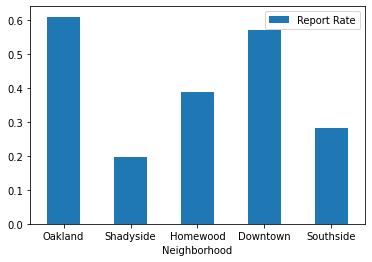

In [29]:
df = pd.DataFrame({'Neighborhood':['Oakland', 'Shadyside', 'Homewood', 'Downtown', 'Southside'], 
                   'Report Rate':[0.6104698141521413, 0.19796395892994342, 0.3891024408994811, 
                                  0.5727444732125074, 0.28329721209733033]})
ax = df.plot.bar(x='Neighborhood', y='Report Rate', rot=0)

## Chart of Most Common 311 Reports

In [28]:
import pandas as pd

data = {'Oakland':  ['Potholes', 'Weeds/Debris', 'Building Maintenance', 'Illegal Parking', 'Replace/Repair a Sign'],
       'Shadyside':  ['Potholes', 'Weeds/Debris', 'Replace/Repair a Sign', 
                      'Street Light - Repair', 'Building Maintenance'],
        'Homewood':  ['Weeds/Debris', 'Potholes', 'Building Maintenance', 
                      'Vacant Building', 'Abandoned Vehicle (parked on street)'],
        'Downtown':  ['Potholes', 'Illegal Parking', 'Street Light - Repair', 'Litter', 'Blocked or Closed Sidewalks'],
        'Southside':  ['Weeds/Debris', 'Potholes', 'Street Light - Repair', 'Litter', 'Blocked or Closed Sidewalks']
       }

df = pd.DataFrame(data, index=['1.', '2.', '3.', '4.', '5.'])

print (df)

                  Oakland              Shadyside  \
1.               Potholes               Potholes   
2.           Weeds/Debris           Weeds/Debris   
3.   Building Maintenance  Replace/Repair a Sign   
4.        Illegal Parking  Street Light - Repair   
5.  Replace/Repair a Sign   Building Maintenance   

                                Homewood                     Downtown  \
1.                          Weeds/Debris                     Potholes   
2.                              Potholes              Illegal Parking   
3.                  Building Maintenance        Street Light - Repair   
4.                       Vacant Building                       Litter   
5.  Abandoned Vehicle (parked on street)  Blocked or Closed Sidewalks   

                      Southside  
1.                 Weeds/Debris  
2.                     Potholes  
3.        Street Light - Repair  
4.                       Litter  
5.  Blocked or Closed Sidewalks  


## Comments on distribution of 311 reports

Oakland had the highest number of 311 reports, per capita, out of the neighborhoods analyzed. This was not a huge surprise, given that it's a college neighborhood and many students have no interest in maintaining high standards for the neighborhood they live in. Part of this is definitely because students A) travel in from other communities, and B) are aware that they'll be here for 4-6 years and then never return and C) are young and irresponsible. Students in college (and their parents) are also more likely to be aware of a resource like 311 (compared to an impoverished neighborhood) given that they are generally educated and have been made aware of the resources available to them. 

Shadyside had the lowest rate of 311 reports. This did not come as a surprise, as the community/family-friendly feel is strong here, and residents have a mutual interest in keeping a well-maintained neighborhood. Given that it is a relatively wealthy area, the city of Pittsburgh also has a strong vested interest in maintaining the area to bring in more taxpayers, potentially decreasing the amount of 311 reports needed. Shadyside is also an area that tourists likely would visit, and first impressions are important. 

Homewood had the third highest rate of 311 reports. Out of all the neighborhoods analyzed, I would think that Homewood has the most incidents justifying a 311 report, but the residents here are unaware of the resource existing. Since the area is relatively impoverished, A) the neighborhood is more dilapidated than most in the city, B) community members are unaware of the resource, and C) community members feel that keeping a well-maintained neighborhood is simply not a top priority.

Downtown had the second highest rate of 311 reports, just short of Oakland. After analyzing arrest data, this did not surprise me, for the same reasons that we reasoned that downtown's arrest rate is so high. There is a small amount of people who actually reside downtown, but there is a large amount of people who travel through it on a daily basis. Things like potholes and busted traffic lights bother people even if they don't live there, so 311 reports are made by people who don't live in the area. This boosts the rate way up. Since it is somewhat of a hub, things also are wore down far more quickly, resulting in more reports. 

Southside had the third highest rate of 311 reports. This was not much of a surprise, and makes sense considering the rest of the data and their justifications. 

### 311 Rankings:

Oakland: 1\
Shadyside: 5\
Homewood: 3\
Downtown: 2\
Southside: 4

# Time to Find the Best Neighborhood!

### Total Rankings:

Oakland: 11\
Shadyside: 13\
Homewood: 7\
CBD: 5\
Southside: 9

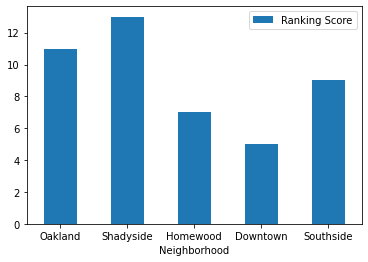

In [3]:
import pandas as pd

df = pd.DataFrame({'Neighborhood':['Oakland', 'Shadyside', 'Homewood', 'Downtown', 'Southside'], 
                   'Ranking Score':[11, 13, 7, 5, 9]})
ax = df.plot.bar(x='Neighborhood', y='Ranking Score', rot=0)